In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col = 0)
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv')

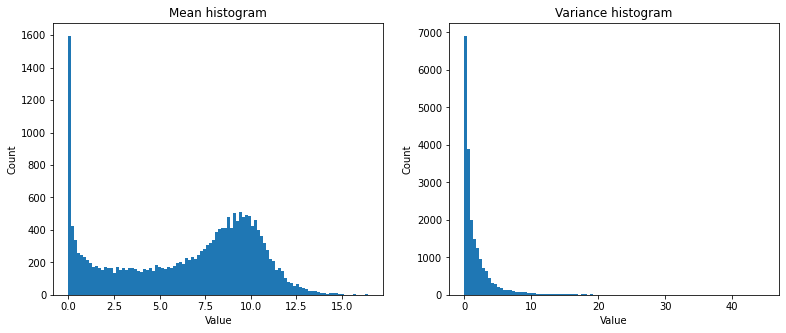

In [3]:
plt.rcParams["figure.figsize"]=13,5


mean_arr = np.mean(data, 0)
var_arr = np.var(data, 0)

plt.subplot(1,2,1)
plt.hist(mean_arr, 100)
plt.title('Mean histogram')
plt.xlabel('Value')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(var_arr, 100)
plt.title('Variance histogram')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

In [4]:
print('There are %s constant features.' % len(np.argwhere(np.array(var_arr == 0))))

There are 267 constant features.


In [5]:
data_new = data.drop(data.columns[np.argwhere(np.array(var_arr == 0)).flatten()], axis = 1)
mean_arr = np.mean(data_new, 0)
var_arr = np.var(data_new, 0)
min_var = 2
data_new.drop(data_new.columns[np.argwhere(np.array(var_arr < min_var)).flatten()], axis = 1, inplace = True)
mean_arr = np.mean(data_new, 0)
var_arr = np.var(data_new, 0)
print(data_new.shape)

(801, 5579)


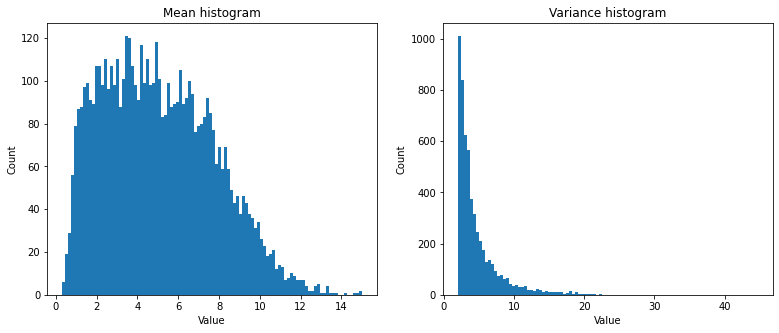

In [6]:
plt.rcParams["figure.figsize"]=13,5


mean_arr = np.mean(data_new, 0)
var_arr = np.var(data_new, 0)

plt.subplot(1,2,1)
plt.hist(mean_arr, 100)
plt.title('Mean histogram')
plt.xlabel('Value')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(var_arr, 100)
plt.title('Variance histogram')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

In [7]:
data_new_standardized = (data_new - mean_arr)/(var_arr ** (1/2))
n = data_new_standardized.shape[0]

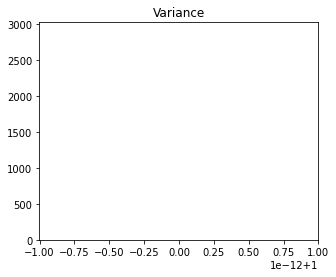

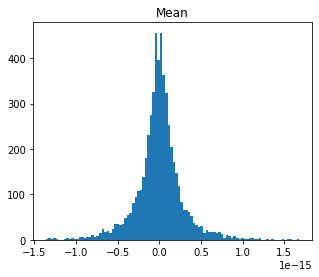

In [8]:
plt.rcParams["figure.figsize"]=5,4

mean_arr = np.mean(data_new_standardized, 0)
var_arr = np.var(data_new_standardized, 0)
plt.hist(var_arr)
plt.title('Variance')
plt.show()
plt.hist(mean_arr, 100)
plt.title('Mean')
plt.show()

## T3 - PCA ##

In [9]:
cov = 1/(n-1)*np.matmul(np.transpose(data_new_standardized),data_new_standardized)

<ipython-input-9-8819c58e8423>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  cov = 1/(n-1)*np.matmul(np.transpose(data_new_standardized),data_new_standardized)


In [10]:
eigenvalues = np.linalg.eig(cov)

In [11]:
w, v = eigenvalues

idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

In [12]:
best_index = np.argmax(w) 
print(f'The  largest eigenvalue is: {w[best_index]}')
print(f'the first 4 eigenvalues:\n {w[0]}\n {w[1]}\n{w[2]}\n {w[3]} \n')
r1 = v[:,best_index]
print(f'the egienvector of the largest eigenvalue is {r1}')


nr_pcs = 4
PC = np.zeros((nr_pcs,n),dtype=int)
for i in range(nr_pcs):
    PC[i] = np.matmul(data_new_standardized, v[:,i])


The  largest eigenvalue is: (855.3647878596865+0j)
the first 4 eigenvalues:
 (855.3647878596865+0j)
 (620.2481013487686+0j)
(511.59166714621966+0j)
 (395.56137022769997+0j) 

the egienvector of the largest eigenvalue is [-0.03004366+0.j -0.00166835+0.j  0.0110903 +0.j ... -0.00832641+0.j
  0.01017265+0.j  0.0021567 +0.j]


c:\users\katane\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


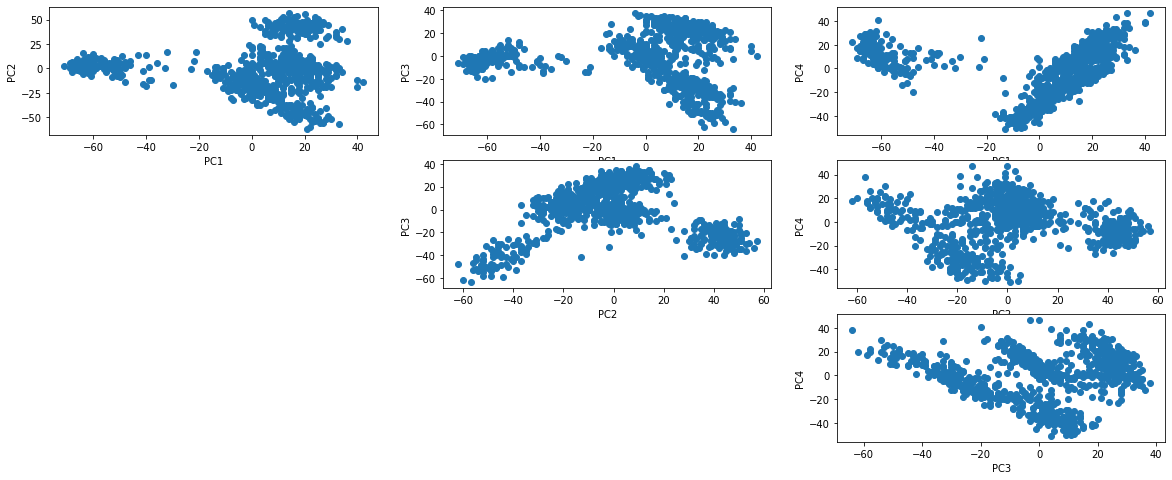

c:\users\katane\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


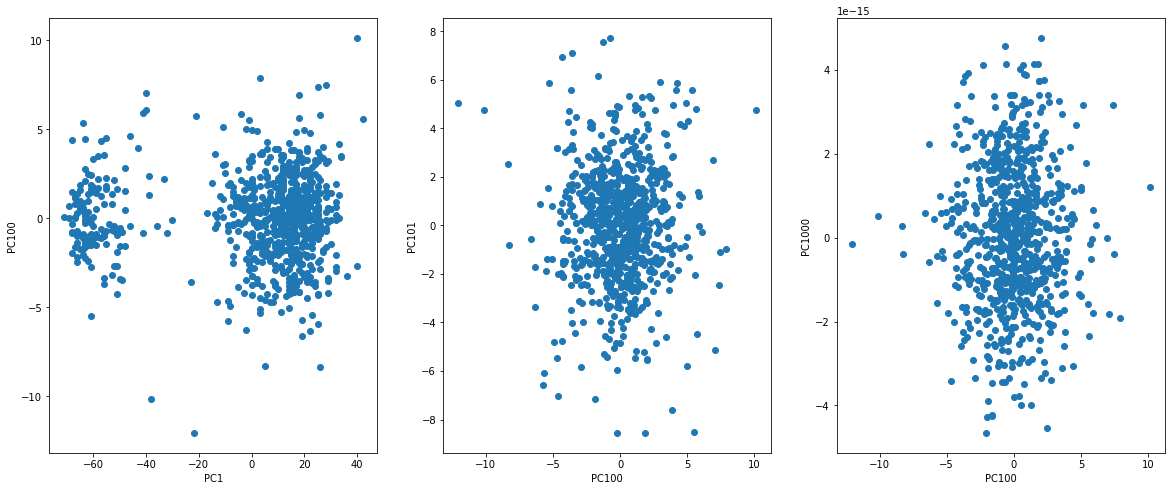

In [13]:
plt.rcParams["figure.figsize"]=20,8

plt.subplot(3,3,1)
plt.scatter(PC[0],PC[1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(3,3,2)
plt.scatter(PC[0],PC[2])
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.subplot(3,3,3)
plt.scatter(PC[0],PC[3])
plt.xlabel('PC1')
plt.ylabel('PC4')

plt.subplot(3,3,5)
plt.scatter(PC[1],PC[2])
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.subplot(3,3,6)
plt.scatter(PC[1],PC[3])
plt.xlabel('PC2')
plt.ylabel('PC4')


plt.subplot(3,3,9)
plt.scatter(PC[2],PC[3])
plt.xlabel('PC3')
plt.ylabel('PC4')

plt.show()


PC100 = np.matmul(data_new_standardized, v[:,100])
PC101 = np.matmul(data_new_standardized, v[:,101])
PC1000 = np.matmul(data_new_standardized, v[:,1000])

plt.subplot(1,3,1)
plt.scatter(PC[0],PC100)
plt.xlabel('PC1')
plt.ylabel('PC100')

plt.subplot(1,3,2)
plt.scatter(PC100,PC101)
plt.xlabel('PC100')
plt.ylabel('PC101')

plt.subplot(1,3,3)
plt.scatter(PC100,PC1000)
plt.xlabel('PC100')
plt.ylabel('PC1000')

plt.show()





c:\users\katane\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


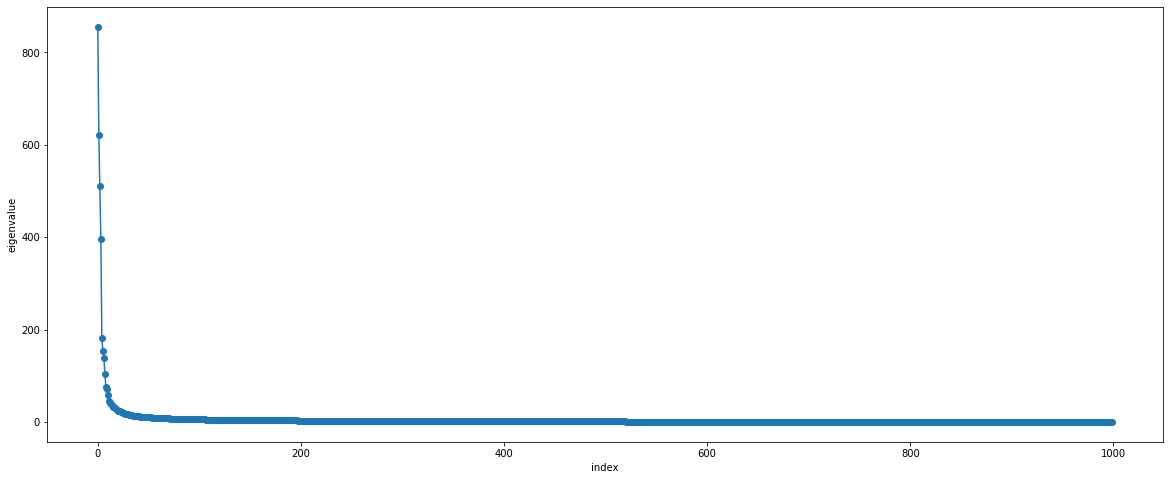

c:\users\katane\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


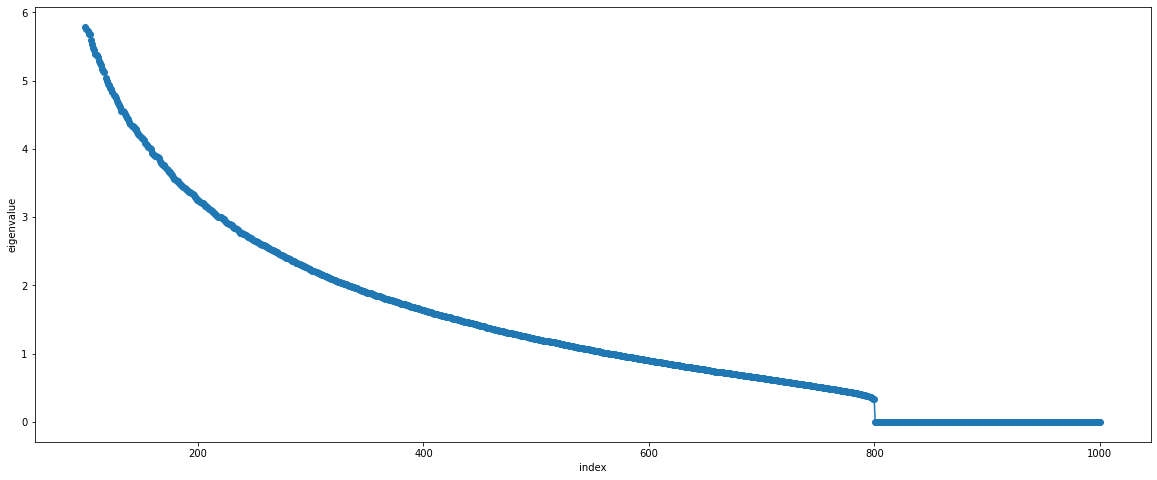

(0.3401982638624225+0j)
(2.0066551788155136e-14+8.064494851097687e-15j)


In [14]:
plt.rcParams["figure.figsize"]=20,8
plt.plot(w[0:1000],'-o')
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.show()


plt.plot(np.linspace(100,1000,900),w[100:1000],'-o')
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.show()

print(w[799])
print(w[800])
## It seems like all eigenvalues after the first 800 are 0

In [15]:
## discard all PCs after the first 800

w = w[0:800]
v = v[:,0:800]

PC = np.real(np.matmul(data_new_standardized, v))





In [16]:

##Pickling a bit for david

import pickle

with open('eigenvalues_first_800.pkl', 'wb') as save_file:
    pickle.dump(w, save_file, -1)
    

with open('eigenvectors_first_800.pkl', 'wb') as save_file:
    pickle.dump(v, save_file, -1)

# Q1.2 - clustering #


In [17]:
def plot_PC(data, labels, K, pc1 = 0, pc2 = 1):
    for k in range(K):
        curr_indices = np.argwhere(labels == k).flatten()
        plt.plot(data[curr_indices, 0], data[curr_indices, 1], '.')


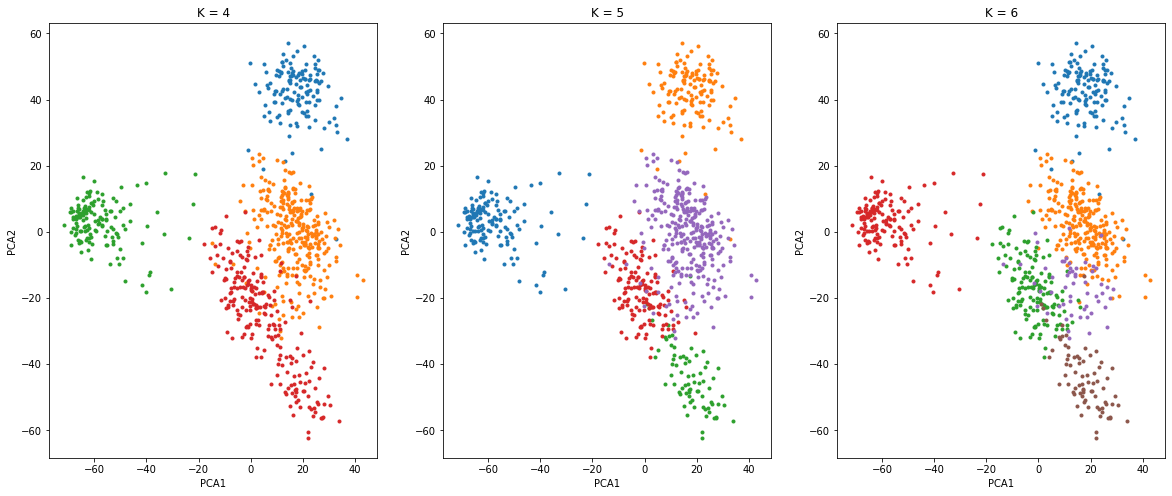

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

K_max = 10
n_tries = 10
K_array = list(range(2, K_max))
dist = cdist(PC, PC)

S_arr_GMM = np.zeros(len(K_array))
calinski_arr_GMM = np.zeros(len(K_array))
davies_arr_GMM = np.zeros(len(K_array))

S_arr_KM = np.zeros(len(K_array))
calinski_arr_KM = np.zeros(len(K_array))
davies_arr_KM = np.zeros(len(K_array))

K_array = list(range(2, K_max))


for i,K in enumerate(K_array):
    S_try = []
    calinski_try = []
    davies_try = []
    for j in range(n_tries):
        gm = GaussianMixture(n_components=K, random_state=0).fit(PC)
        labels = gm.predict(PC)
        calinski_try.append(calinski_harabasz_score(PC, labels))
        davies_try.append(davies_bouldin_score(PC, labels))
        S_try.append(silhouette_score(PC, labels))
        
    calinski_arr_GMM[i] = np.mean(calinski_try)
    davies_arr_GMM[i] = np.mean(davies_try)
    S_arr_GMM[i] = np.mean(S_try)

    S_try = []
    calinski_try = []
    davies_try = []
    for j in range(n_tries):
        km = KMeans(n_clusters=K, random_state=0).fit(PC)
        labels = km.predict(PC)
        calinski_try.append(calinski_harabasz_score(PC, labels))
        davies_try.append(davies_bouldin_score(PC, labels))
        S_try.append(silhouette_score(PC, labels))
        
    calinski_arr_KM[i] = np.mean(calinski_try)
    davies_arr_KM[i] = np.mean(davies_try)
    S_arr_KM[i] = np.mean(S_try)
                           
    if(K in [4,5,6]):
        plt.subplot(1,3,K-3)
        plot_PC(PC, labels, K)
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.title(f'K = {K}')
        
    
plt.show()


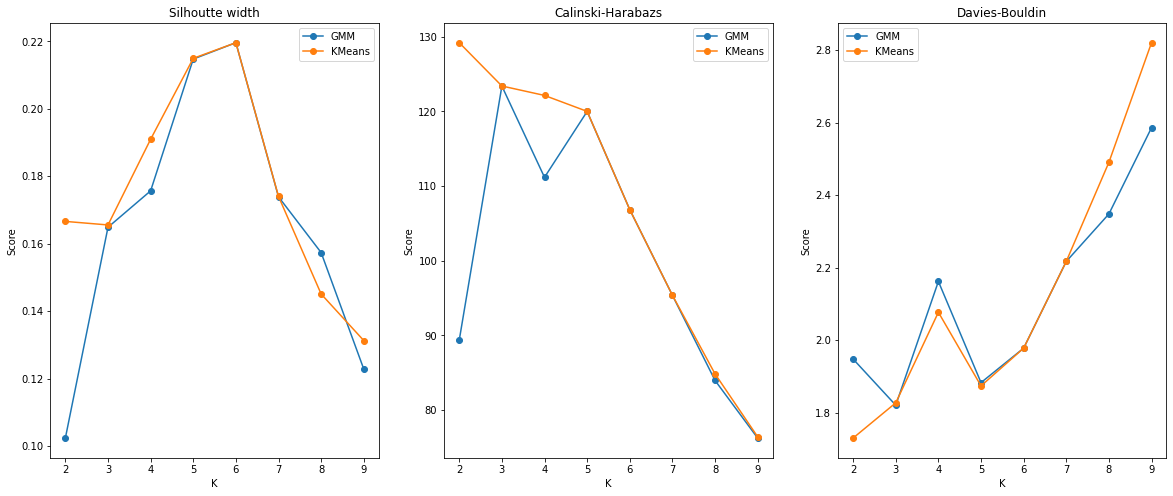

In [19]:
plt.rcParams["figure.figsize"]=20,8

plt.subplot(1,3,1)
plt.plot(K_array, S_arr_GMM, 'o-')
plt.plot(K_array, S_arr_KM, 'o-')
plt.legend(['GMM', 'KMeans'])
plt.title('Silhoutte width')
plt.xlabel('K')
plt.ylabel('Score')

plt.subplot(1,3,2)
plt.plot(K_array, calinski_arr_GMM, 'o-')
plt.plot(K_array, calinski_arr_KM, 'o-')
plt.legend(['GMM', 'KMeans'])
plt.title('Calinski-Harabazs')
plt.xlabel('K')
plt.ylabel('Score')

plt.subplot(1,3,3)
plt.plot(K_array, davies_arr_GMM, 'o-')
plt.plot(K_array, davies_arr_KM, 'o-')
plt.legend(['GMM', 'KMeans'])
plt.title('Davies-Bouldin')
plt.xlabel('K')
plt.ylabel('Score')

plt.show()


In [20]:
K = 5
kmeans = KMeans(n_clusters=K, random_state=0).fit(PC)

<ipython-input-21-8df6e1440c4c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,4,1)
<ipython-input-21-8df6e1440c4c>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,4,2)
<ipython-input-21-8df6e1440c4c>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

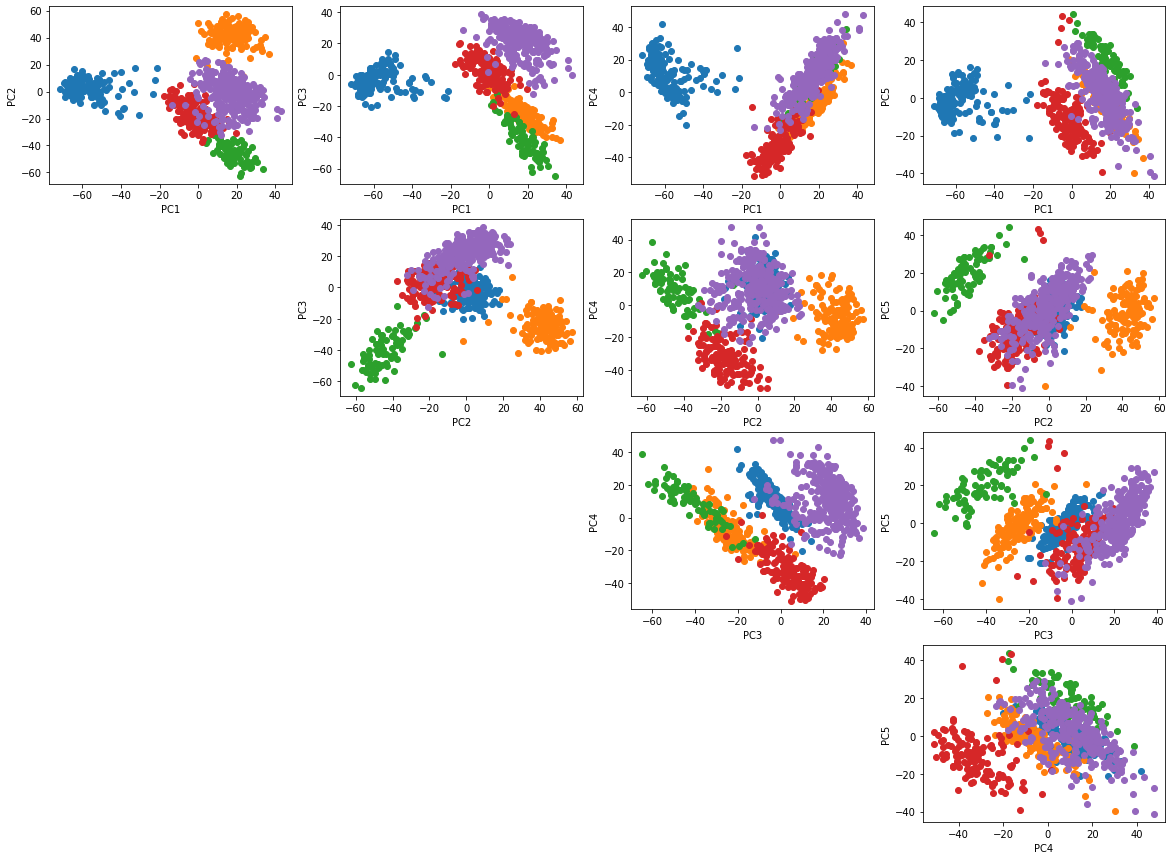

In [21]:
plt.rcParams["figure.figsize"]=20,15

for i in range(K+1):
    indexes = np.argwhere(kmeans.labels_ == i)[:,0]
    
    plt.subplot(4,4,1)
    plt.scatter(PC[indexes,0],PC[indexes,1])
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.subplot(4,4,2)
    plt.scatter(PC[indexes,0],PC[indexes,2])
    plt.xlabel('PC1')
    plt.ylabel('PC3')

    plt.subplot(4,4,3)
    plt.scatter(PC[indexes,0],PC[indexes,3])
    plt.xlabel('PC1')
    plt.ylabel('PC4')
    
    plt.subplot(4,4,4)
    plt.scatter(PC[indexes,0],PC[indexes,4])
    plt.xlabel('PC1')
    plt.ylabel('PC5')

    plt.subplot(4,4,6)
    plt.scatter(PC[indexes,1],PC[indexes,2])
    plt.xlabel('PC2')
    plt.ylabel('PC3')

    plt.subplot(4,4,7)
    plt.scatter(PC[indexes,1],PC[indexes,3])
    plt.xlabel('PC2')
    plt.ylabel('PC4')
    
    plt.subplot(4,4,8)
    plt.scatter(PC[indexes,1],PC[indexes,4])
    plt.xlabel('PC2')
    plt.ylabel('PC5')


    plt.subplot(4,4,11)
    plt.scatter(PC[indexes,2],PC[indexes,3])
    plt.xlabel('PC3')
    plt.ylabel('PC4')
    
    plt.subplot(4,4,12)
    plt.scatter(PC[indexes,2],PC[indexes,4])
    plt.xlabel('PC3')
    plt.ylabel('PC5')
    
    plt.subplot(4,4,16)
    plt.scatter(PC[indexes,3],PC[indexes,4])
    plt.xlabel('PC4')
    plt.ylabel('PC5')

plt.show()

## Consensus clustering ##

In [22]:
from random import sample
from sklearn.cluster import KMeans

In [23]:
def CDF(flat_C, q):
    return len(np.argwhere(flat_C <= q))/len(flat_C)


 K: 2
number of 0-elements in J: 0
nr of elements in C not 0 or 1: 1278
ratio of elements in C being either 0 or 1: 0.9980081078427246
PAC_K: 0.001991892157275299

 K: 3
number of 0-elements in J: 0
nr of elements in C not 0 or 1: 254746
ratio of elements in C being either 0 or 1: 0.6029526138519111
PAC_K: 0.397047386148089

 K: 4
number of 0-elements in J: 0
nr of elements in C not 0 or 1: 140156
ratio of elements in C being either 0 or 1: 0.7815527095500163
PAC_K: 0.21844729044998368

 K: 5
number of 0-elements in J: 0
nr of elements in C not 0 or 1: 28810
ratio of elements in C being either 0 or 1: 0.9550967034028937
PAC_K: 0.044903296597106346

 K: 6
number of 0-elements in J: 0
nr of elements in C not 0 or 1: 52742
ratio of elements in C being either 0 or 1: 0.9177962627863735
PAC_K: 0.0822037372136265

 K: 7
number of 0-elements in J: 0
nr of elements in C not 0 or 1: 64266
ratio of elements in C being either 0 or 1: 0.899834944147531
PAC_K: 0.10016505585246904

 K: 8
number of 

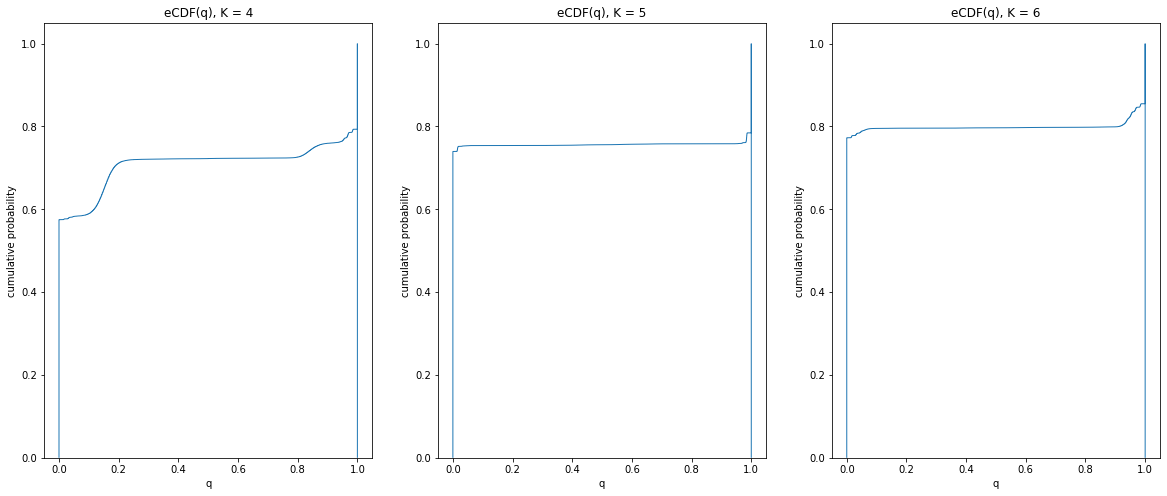

In [24]:
X = PC
n,p = X.shape

K_max = 10
nr_tries = 100
K_array = list(range(2, K_max))
nr_samples = int(np.floor(0.8*n))
PAC = np.zeros(len(K_array))

for K in K_array:
    
    C = np.zeros((n,n))
    M = np.zeros((n,n))
    J = np.zeros((n,n))
    
    for m in range(nr_tries):
        #Draw samples w/o replacement
        indexes = np.array(sample(range(n), nr_samples))
        X_m = X[indexes,:]
        
        #Perform k-means clustering
        kmeans = KMeans(n_clusters=K, random_state=0).fit(X_m)
        labels = kmeans.labels_
        
        #Feed values into J_m and M_m
        M_m = np.zeros((n,n))
        J_m = np.zeros((n,n))
        j_m = np.zeros(n)
        j_m[indexes] = 1
        j_m = j_m[np.newaxis]
        J_m = np.transpose(j_m)@j_m
        
        for k in range(K):
            ind = np.argwhere(labels == k)
            m_m = np.zeros(n)
            m_m[indexes[ind]] = 1
            m_m = m_m[np.newaxis]
            M_m += np.transpose(m_m)@m_m
        
        
        M += M_m
        J += J_m
    
    J_zeros = np.argwhere(J == 0)
    C = np.divide(M,J)
    
    flat_C = C.flatten()
    C_zeros = np.argwhere(flat_C == 0)
    C_ones = np.argwhere(flat_C == 1)
    ratio = (len(C_ones) + len(C_zeros))/len(flat_C)
    PAC_K = CDF(flat_C,0.99) - CDF(flat_C,0.01)
    PAC[K-2] = PAC_K
    lil_C = np.sort(flat_C)
    
    
    
    print(f'\n K: {K}')
    print(f'number of 0-elements in J: {len(J_zeros)}')
    print(f'nr of elements in C not 0 or 1: {len(flat_C)- (len(C_ones) + len(C_zeros))}')
    print(f'ratio of elements in C being either 0 or 1: {ratio}')
    print(f'PAC_K: {PAC_K}')
    
    
    plt.rcParams["figure.figsize"]=20,8 
    
    
    if(K in [4,5,6]):
        plt.subplot(1,3,K-3)
        plt.hist(flat_C, len(flat_C), density=True, histtype='step',cumulative=True, label='Empirical')
        plt.title(f'eCDF(q), K = {K}')
        plt.xlabel('q')
        plt.ylabel('cumulative probability')

plt.show()
    


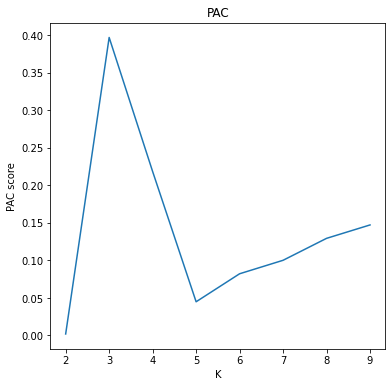

In [25]:
plt.rcParams["figure.figsize"]=6,6 
plt.plot(K_array, PAC)
plt.title('PAC')
plt.xlabel('K')
plt.ylabel('PAC score')
plt.show()